Welcome! 
We start by loading the dataset.
Note that activity is our label.

People walked around in a 25 m2 apartment for 3 minutes. The tags appear to have micrometer precision 10^-6 and record the location. 

The tag locations where recorded with 1/10 second intervalls each, roughly.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Read the file
column_names = ['sequence_name', 'tag_identificator', 'timestamp', 'date', 'x-coordinate', 'y-coordinate', 'z-coordinate', 'activity']
data_act = pd.read_csv('ConfLongDemo_JSI.txt',sep=',',header=None, names=column_names)


# Code below shows number of unique values per feature
'''print('total number of data points: ', data_act.shape)
for title in column_names:
    print(title, data_act[title].unique())'''
    


"print('total number of data points: ', data_act.shape)\nfor title in column_names:\n    print(title, data_act[title].unique())"

In [5]:
# Data cleaning cell

# Makes the data easier to understand. Replace name of tag_idintificator
data_act = data_act.replace(to_replace= '010-000-024-033', value='ankle_left')
data_act = data_act.replace(to_replace= '010-000-030-096', value='ankle_right')
data_act = data_act.replace(to_replace= '020-000-033-111', value='chest')
data_act = data_act.replace(to_replace= '020-000-032-221', value='belt')

# Convert date to a pandas datetime object 
# For more info on datetime objects: https://www.programiz.com/python-programming/datetime
data_act['date'] = pd.to_datetime(data_act['date'], format='%d.%m.%Y %H:%M:%S:%f')

# Extract certain parts based on tag (belt, chest etc)
'''data_act = data_act[data_act['tag_identificator'].isin(['belt', 'chest'])] # Removes ankle data
display(data_act)'''

# We can remove certain parts of the data based on label. 
'''display(data_act)
data_act = data_act[data_act['activity'].isin(['walking','sitting','lying', 'sitting on the ground', 'on all fours'])] # Removes ankle data
display(data_act)
data_act = data_act[data_act['activity'].isin(['walking','sitting','lying'])]
display(data_act)
data_act = data_act[data_act['activity'].isin(['walking'])]
display(data_act)'''


"display(data_act)\ndata_act = data_act[data_act['activity'].isin(['walking','sitting','lying', 'sitting on the ground', 'on all fours'])] # Removes ankle data\ndisplay(data_act)\ndata_act = data_act[data_act['activity'].isin(['walking','sitting','lying'])]\ndisplay(data_act)\ndata_act = data_act[data_act['activity'].isin(['walking'])]\ndisplay(data_act)"

,sequence_name,tag_identificator,timestamp,date,x-coordinate,y-coordinate,z-coordinate,activity
1,A01,chest,633790226051820913,2009-05-27 14:03:25.183,4.291954,1.781140,1.344495,walking
2,A01,belt,633790226052091205,2009-05-27 14:03:25.210,4.359101,1.826456,0.968821,walking
5,A01,chest,633790226052902087,2009-05-27 14:03:25.290,4.364077,1.767691,1.299996,walking
6,A01,belt,633790226053172379,2009-05-27 14:03:25.317,4.373908,1.887960,0.769019,walking
8,A01,chest,633790226053983265,2009-05-27 14:03:25.397,4.244914,1.981682,1.308759,walking
...,...,...,...,...,...,...,...,...
172,A01,chest,633790226109123126,2009-05-27 14:03:30.913,2.816716,2.715505,0.838942,sitting down
173,A01,belt,633790226109393416,2009-05-27 14:03:30.940,2.978050,2.273625,0.756690,sitting down
175,A01,chest,633790226110204293,2009-05-27 14:03:31.020,2.879562,2.489763,1.004936,sitting down
176,A01,belt,633790226110474590,2009-05-27 14:03:31.047,2.963275,2.418678,0.717980,sitting down


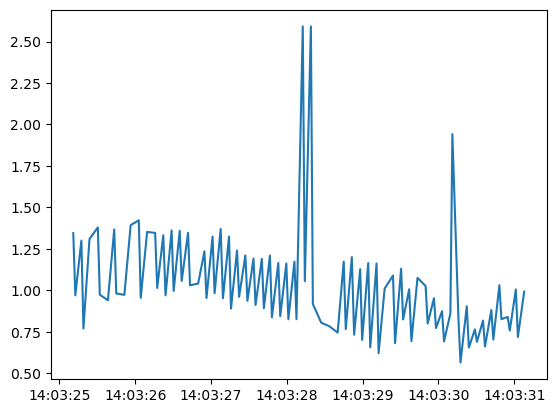

In [146]:
# Show plot of z-coordinate change over time for belt
data_act_reduced = data_act[data_act['tag_identificator'].isin(['belt'])]
data_act_reduced = data_act.head(100) # We reduce the amount of rows and only look at the first 100.
display(data_act_reduced)
plt.plot(data_act_reduced['date'], data_act_reduced['z-coordinate'])
plt.show()

Conclusions drawn from observing the data:
Each sequence_name appears to be one person being recorded roughly 3 minutes in a row. 
We thus have 25 instances of people being recorded 3 minutes in a row.
During these 3 minutes, they change positions quite frequently.


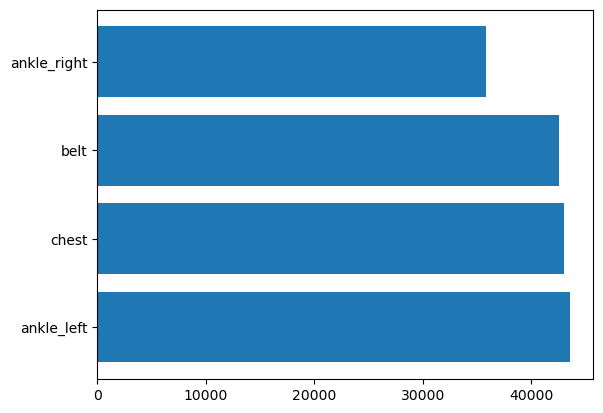

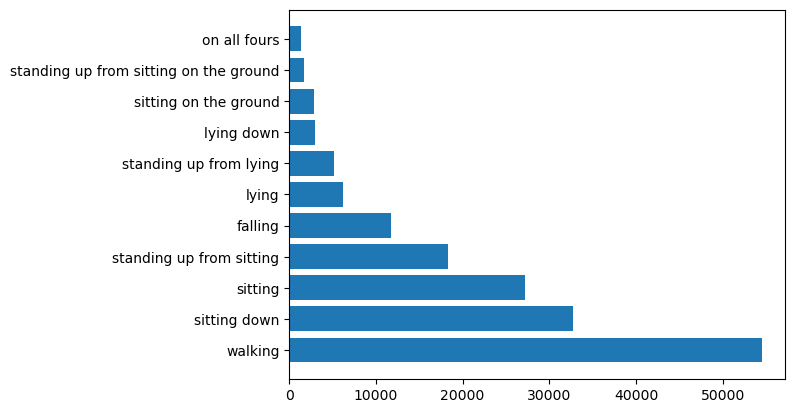

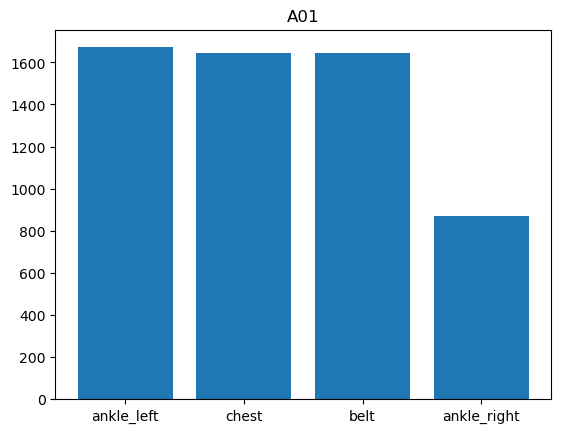

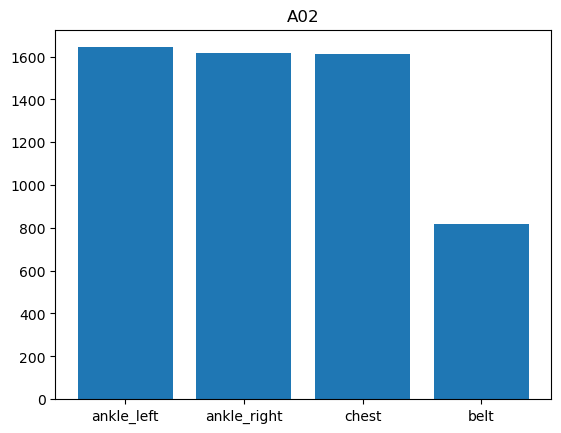

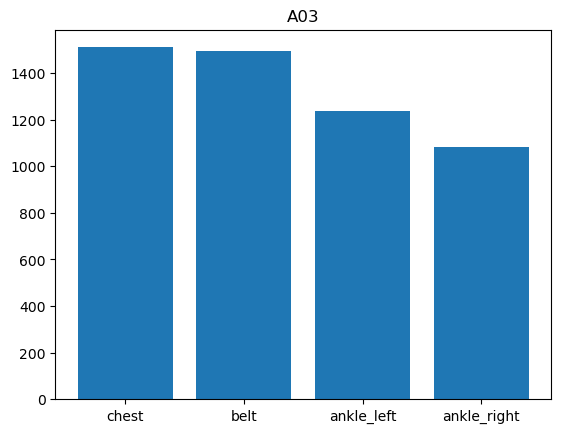

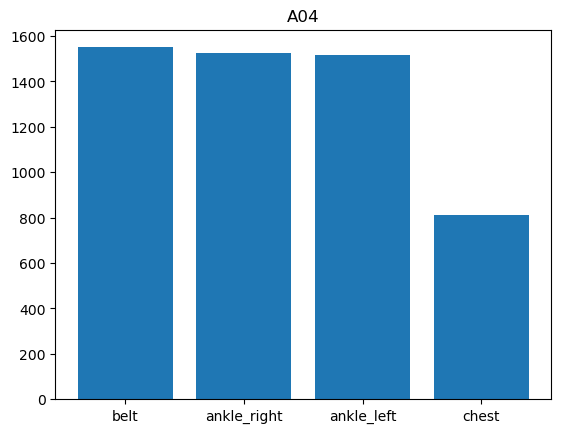

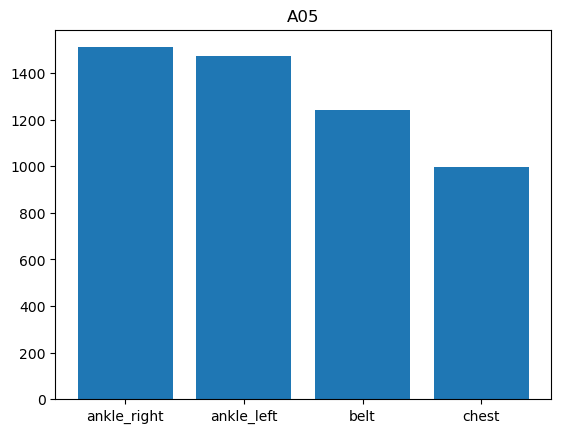

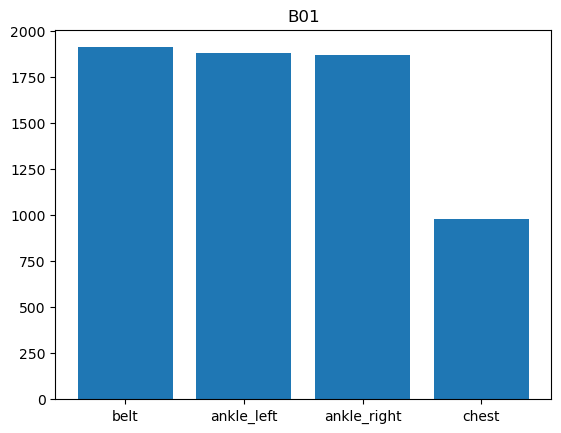

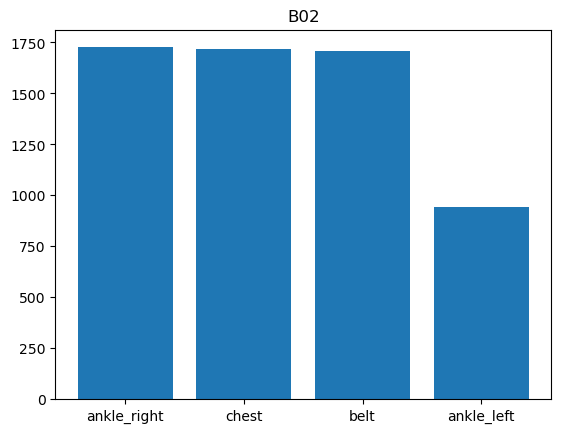

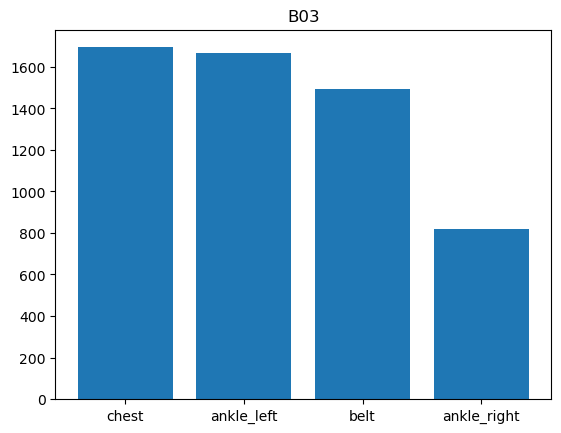

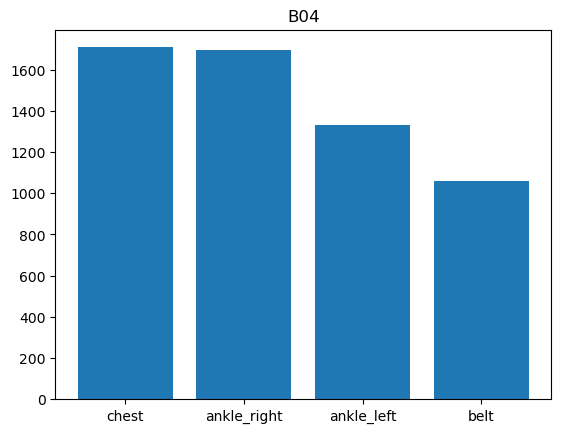

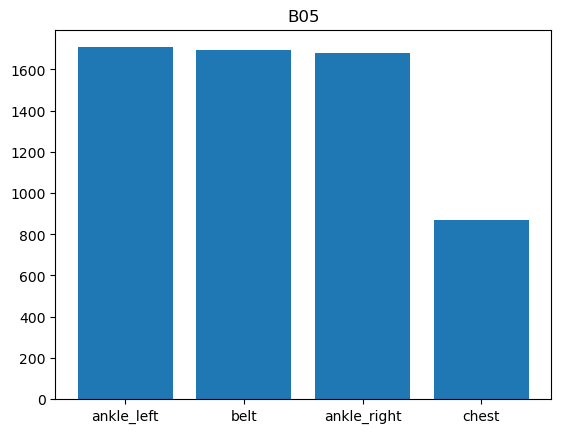

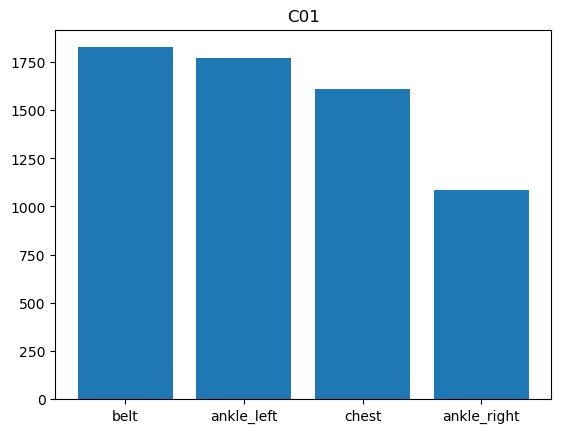

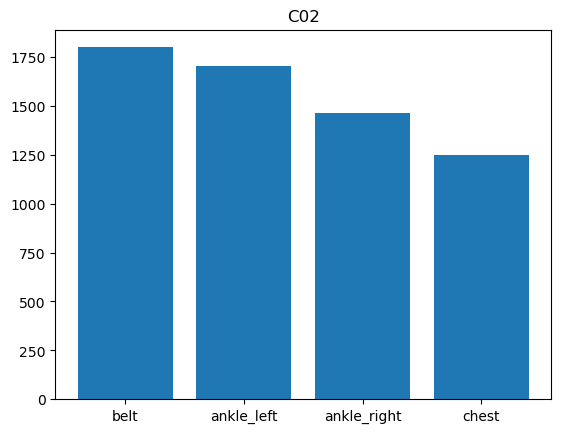

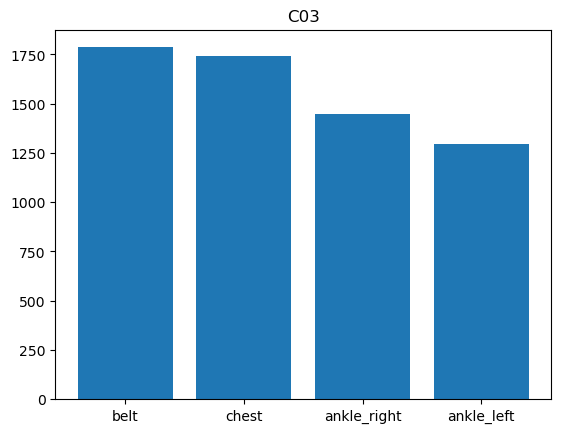

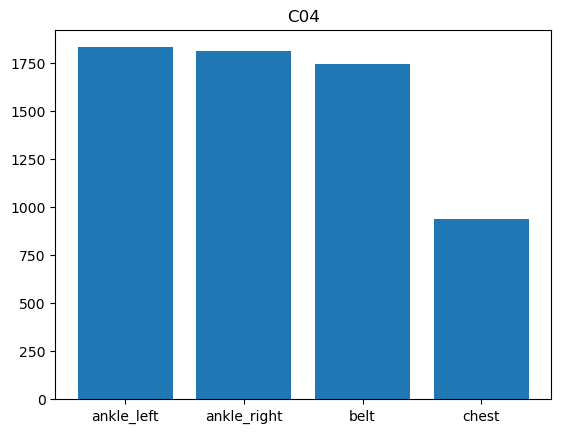

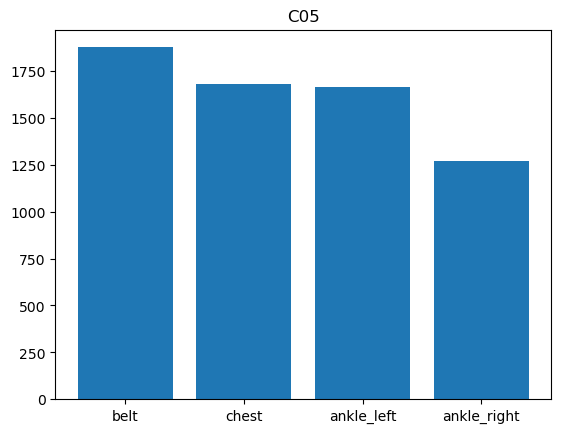

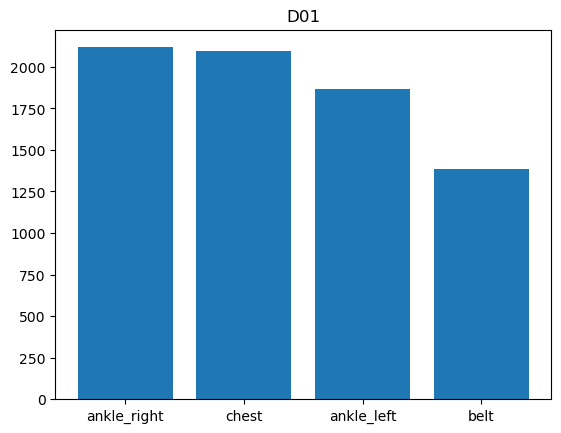

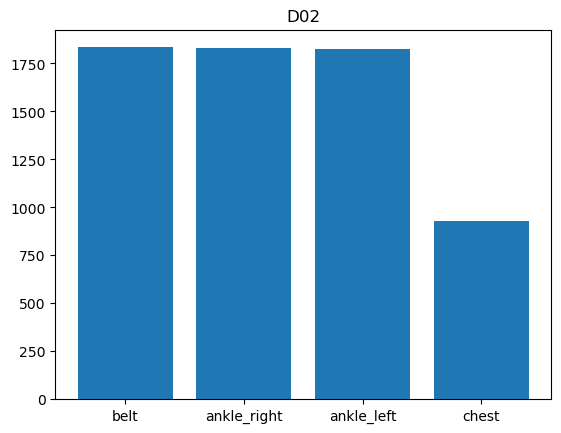

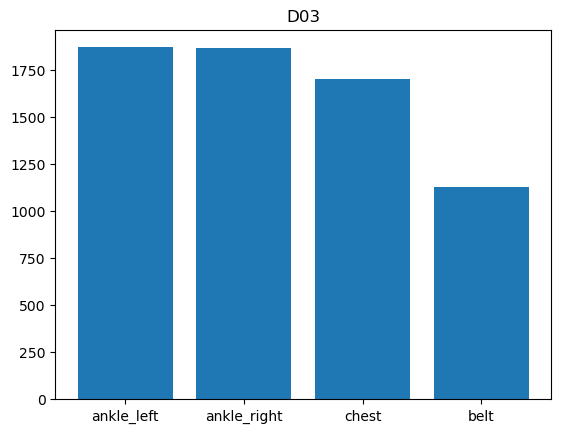

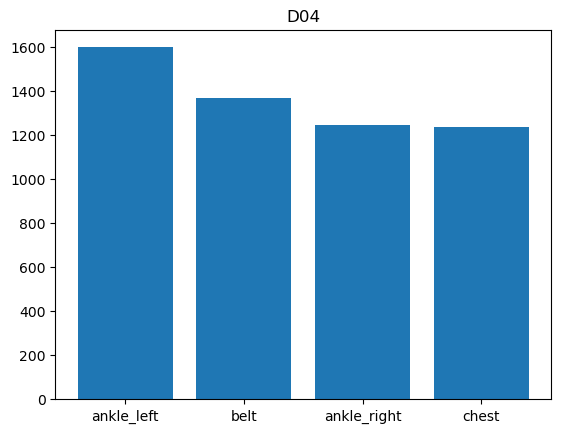

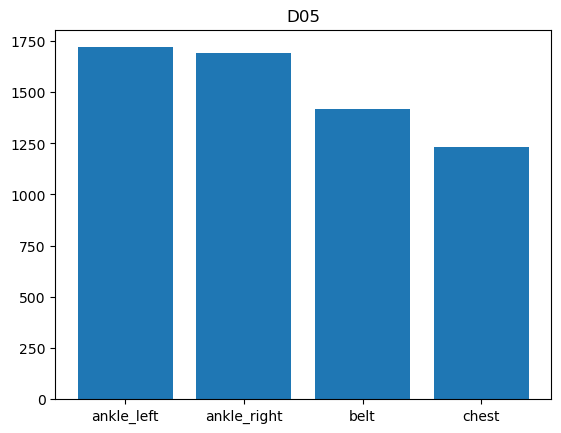

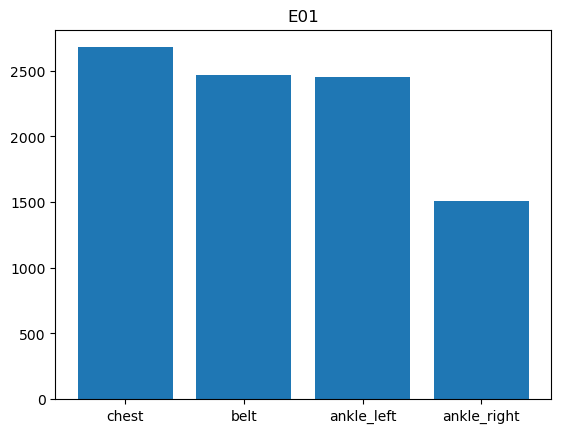

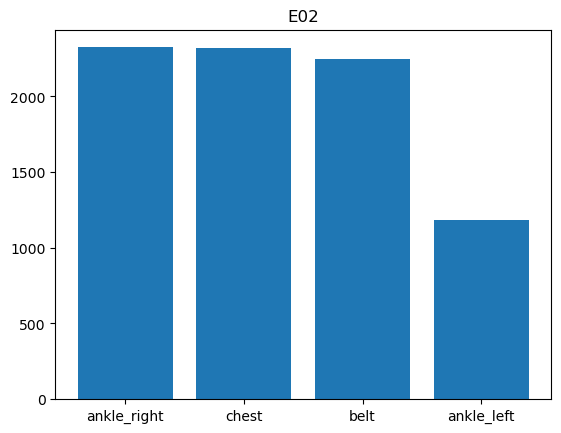

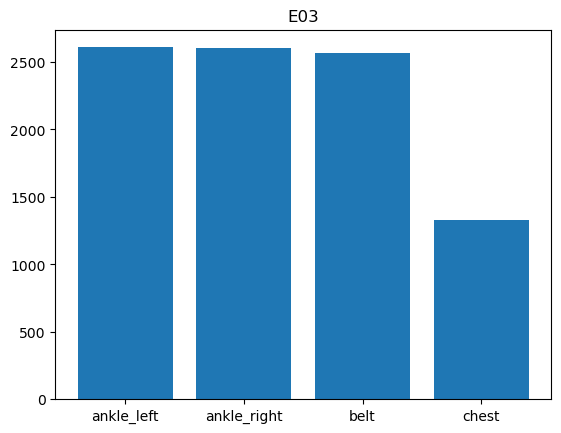

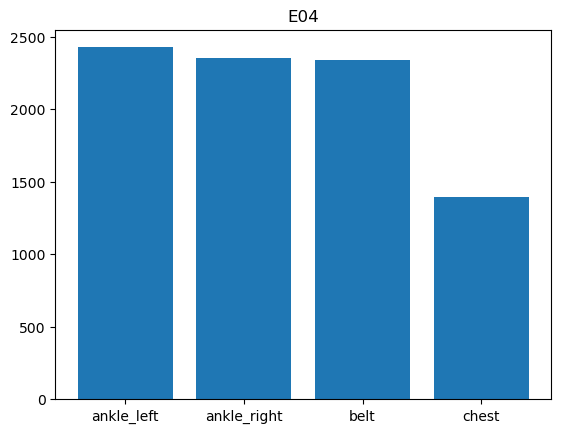

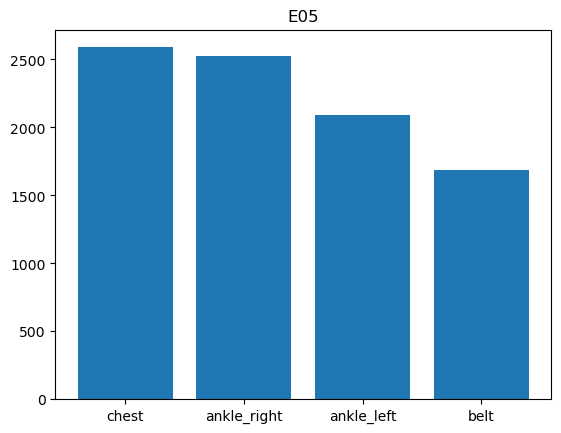

In [8]:
# This section creates a bar chart that shows how many data points there are from each sensor.
# Overall rather similar amounts in all categories, slightly less data points form the ankle right sensor.
import matplotlib.pyplot as plt
import numpy as np

# Shows distribution of tag_identificators in overall data
plt.barh(data_act['tag_identificator'].unique(), data_act['tag_identificator'].value_counts())
plt.show()

# Show distribution of labels
plt.barh(data_act['activity'].unique(), data_act['activity'].value_counts())
plt.show()

#plt.barh(data_act['sequence_name'].unique(), data_act['sequence_name'].value_counts())
#plt.show()

# Shows distribution of tag_identificators for each sequence_name. Conclusion: differs but they all conatin 
# informatin from all sensors
for sequence in data_act['sequence_name'].unique():
    data_act_current = data_act[data_act['sequence_name'].isin([sequence])]
    plt.bar(data_act_current['tag_identificator'].unique(), data_act_current['tag_identificator'].value_counts())
    #plt.pie(data_act_current['tag_identificator'].value_counts(), labels=data_act_current['tag_identificator'].unique(), radius=0.3)
    plt.title(sequence)
    plt.show()
    


In [9]:
# Here, we attempt to identify points recorded at roughly the same time that show the same position.
#data_act.resample('S', on='date')
#display(data_act)
#data_act["date"].max() - data_act["date"].min()

Timedelta('0 days 04:48:08.480000')

In [11]:
# This cell tries to group data from 
data_act_reduced = data_act[data_act['sequence_name'].isin(['B02'])]
display(data_act_reduced)

,sequence_name,tag_identificator,timestamp,date,x-coordinate,y-coordinate,z-coordinate,activity
34120,B02,ankle_right,633790203145832542,2009-05-27 13:25:14.583,2.997231,1.921844,-0.092406,walking
34121,B02,chest,633790203146102836,2009-05-27 13:25:14.610,3.210686,2.379043,1.391759,walking
34122,B02,belt,633790203146373133,2009-05-27 13:25:14.637,3.432703,2.389436,0.947170,walking
34123,B02,ankle_left,633790203146643424,2009-05-27 13:25:14.663,3.543335,1.528004,0.213834,walking
34124,B02,chest,633790203147184013,2009-05-27 13:25:14.720,3.160179,2.373081,1.357668,walking
...,...,...,...,...,...,...,...,...
40206,B02,ankle_right,633790205159220435,2009-05-27 13:28:35.923,2.375026,1.842045,-0.206452,walking
40207,B02,ankle_left,633790205159761021,2009-05-27 13:28:35.977,2.284246,2.072215,0.226599,walking
40208,B02,belt,633790205160031320,2009-05-27 13:28:36.003,2.894210,1.851112,0.855576,walking
40209,B02,ankle_right,633790205160301614,2009-05-27 13:28:36.030,2.395405,1.848241,0.161675,walking


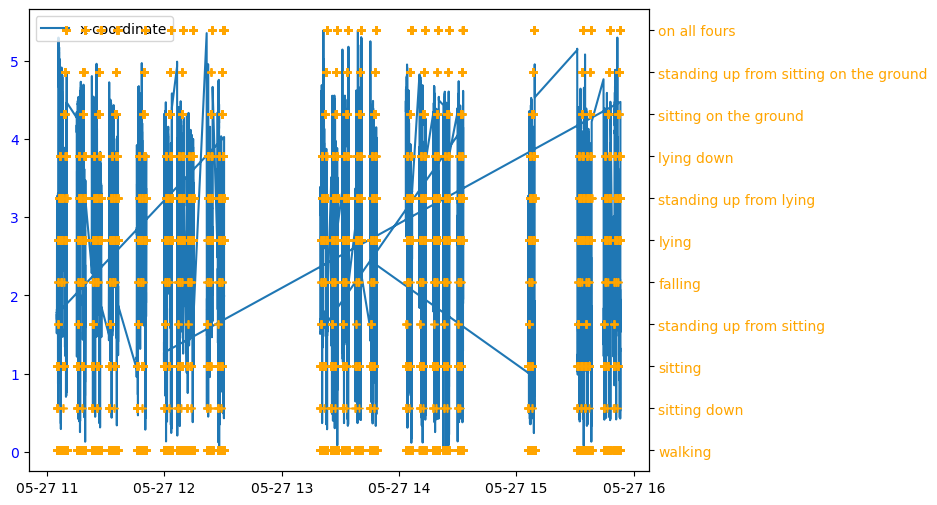

In [15]:
# This cell visualizes how one paramater for one tag changes over time within one sequence


# 1. Select a sequence
sought_sequence = 'A04'
data_act_one_sequence = data_act[data_act['sequence_name'].isin([sought_sequence])]
#data_act_one_sequence = data_act_one_sequence.head(200)

#1.5 Select one type of tag
sought_tag = 'belt'
data_act_one_sequence = data_act[data_act['tag_identificator'].isin([sought_tag])]

# 2. Select one parameter
x_coordinate_vector = data_act_one_sequence['x-coordinate']
time = data_act_one_sequence['date']
activity = data_act_one_sequence['activity']

# 3. Plot that parameter over time
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(time, x_coordinate_vector, label = 'x-coordinate')
ax.tick_params(axis='y', labelcolor='blue')

# 4. Add markers for the labels in the same plot
ax2 = ax.twinx()
ax2.plot('date', 'activity', '+', data = data_act_one_sequence, label= 'acitivity', color = 'orange')
ax2.tick_params(axis='y', labelcolor='orange')

# 5. Finalize and present plot
ax.legend(loc = 'upper left')

plt.show()


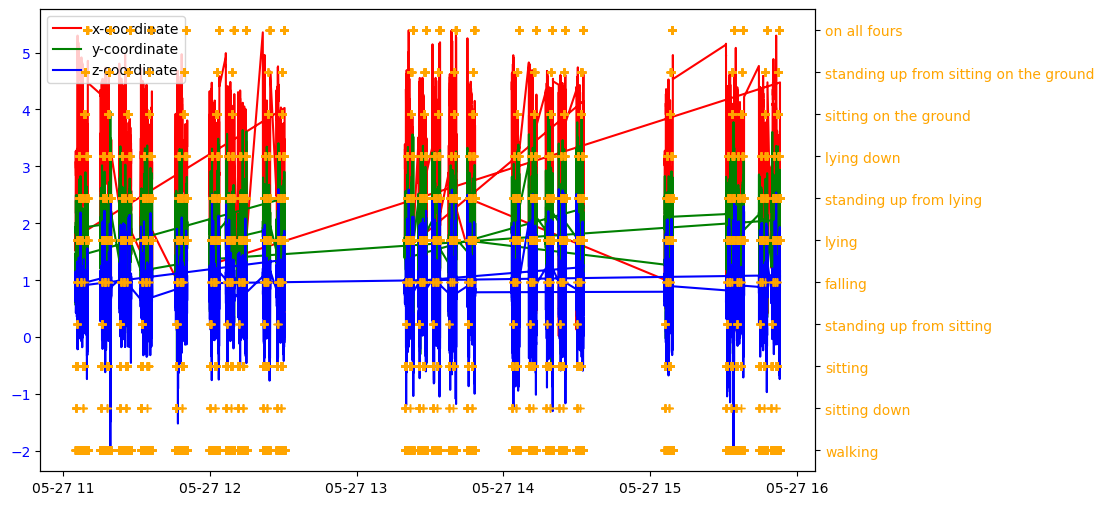

In [22]:
# This cell visualizes how one paramater for one tag changes over time within one sequence.
# This does that for several lines in one plot


# 1. Select a sequence and 
sought_sequence = 'A04'
data_act_one_sequence = data_act[data_act['sequence_name'].isin([sought_sequence])]

# 1.2 Optionally select a certain tag (belt, chest etc.)
sought_tag = 'belt'
data_act_one_sequence = data_act[data_act['tag_identificator'].isin([sought_tag])]


#. 1.3 Optionally view only the first few samples
#data_act_one_sequence = data_act_one_sequence.head(200)

# 2. Select parameters
x_coordinate_vector = data_act_one_sequence['x-coordinate']
y_coordinate_vector = data_act_one_sequence['y-coordinate']
z_coordinate_vector = data_act_one_sequence['z-coordinate']

time = data_act_one_sequence['date']
activity = data_act_one_sequence['activity']

# 3. Plot x parameter over time
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(time, x_coordinate_vector, label = 'x-coordinate', color = 'red')

# 3.1 Plot y parameter over time
ax.plot(time, y_coordinate_vector, label = 'y-coordinate', color = 'green')


# 3.2 Plot z parameter over time
ax.plot(time, z_coordinate_vector, label = 'z-coordinate', color = 'blue')
ax.tick_params(axis='y', labelcolor='blue')


# 4. Add markers for the labels in the same plot
ax2 = ax.twinx()
ax2.plot('date', 'activity', '+', data = data_act_one_sequence, label= 'acitivity', color = 'orange')
ax2.tick_params(axis='y', labelcolor='orange')

# 5. Finalize and present plot
ax.legend(loc = 'upper left')

plt.show()


# Conclusions: there appear to be some correlations between labels and individual coordinates. Especially for x
# coordinates.

# Furthermore, there appear to be fairly long periods of time where one sensor does not provide any data


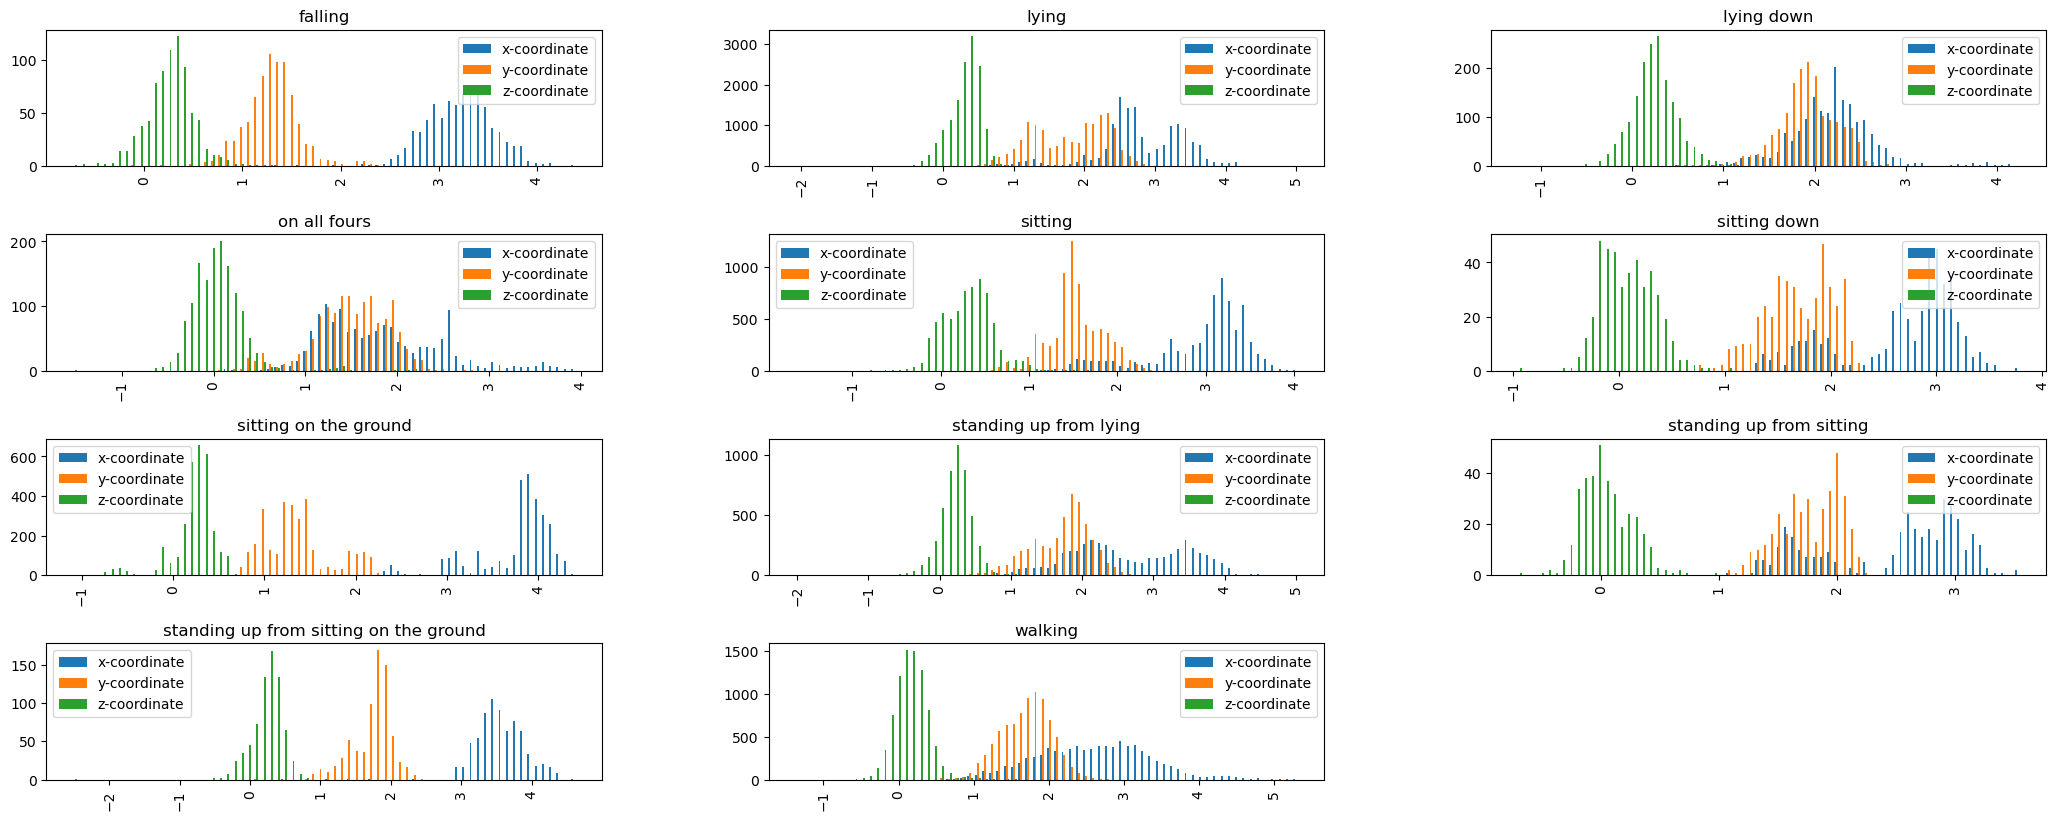

In [29]:
# This cell aims to visualize the dirstibution of x, y and z locations within different labels/activities

# For a certain label we want to plot a distribution (histogram) for the values 
# that a certain tag and coordinate takes

# 1. Select which tag to analyze
sought_tag = 'ankle_right'
data_act_one_tag = data_act[data_act['tag_identificator'].isin([sought_tag])]


# 2. Create histograms. We can feed a list of columns, what an amazing feature!
ax = data_act_one_tag.hist(column=['x-coordinate', 'y-coordinate', 'z-coordinate'], by='activity', bins=70, figsize=[25, 10], legend='upper right')


# 2.1 Part below can be used to look at one coordinate isolated. Note that the axis changes for different ones
#ax = data_act_one_tag.hist(column='x-coordinate', by='activity', bins=70, figsize=[10, 10])
#ax2 = data_act_one_tag.hist(column='y-coordinate', by='activity', bins=70, figsize=[10, 10], color='red')
#ax3 = data_act_one_tag.hist(column='z-coordinate', by='activity', bins=70, figsize=[10, 10], color='green')
plt.show()


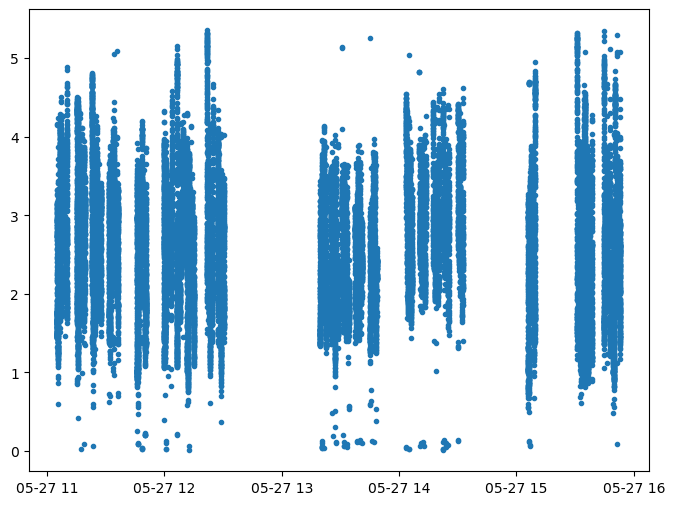

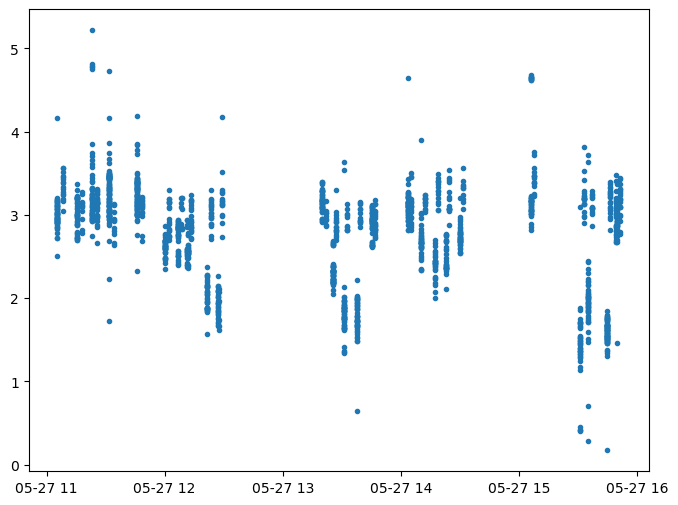

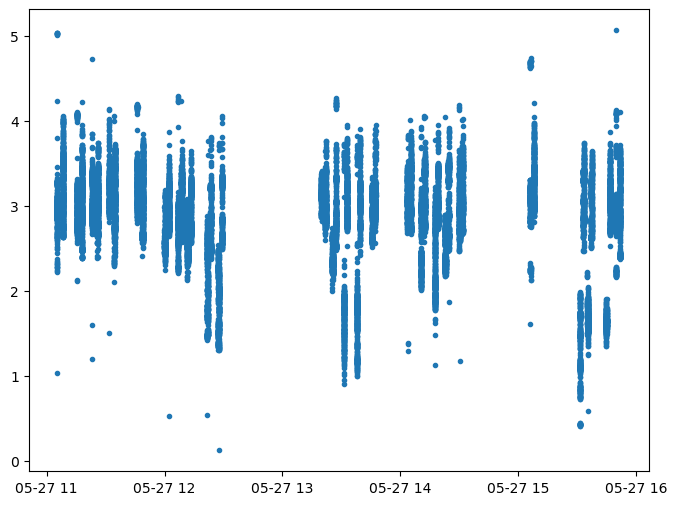

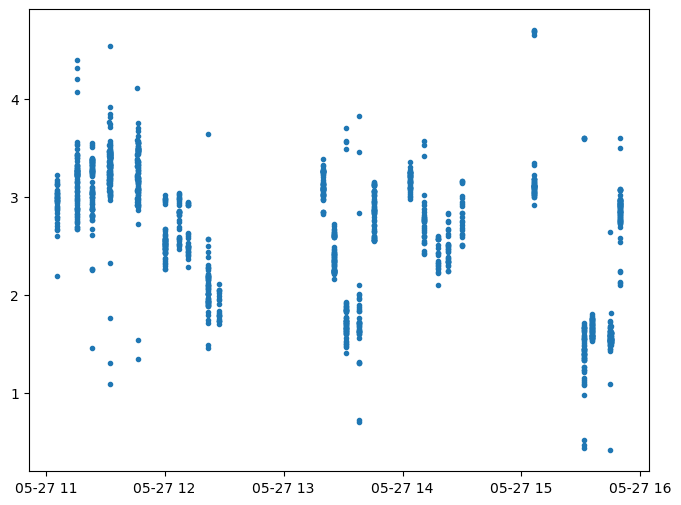

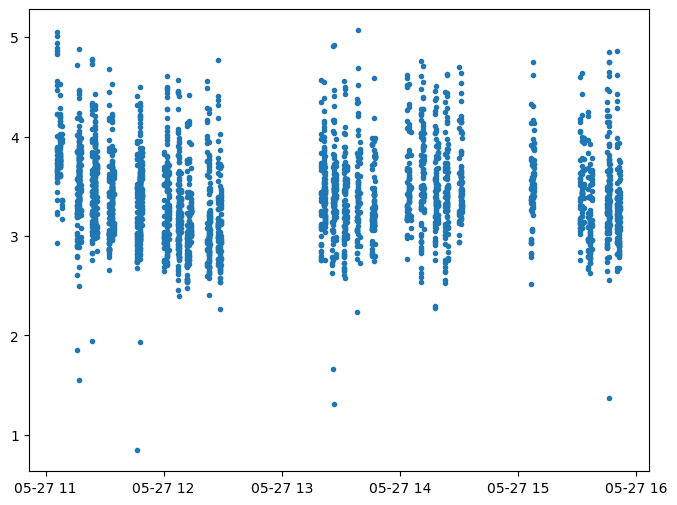

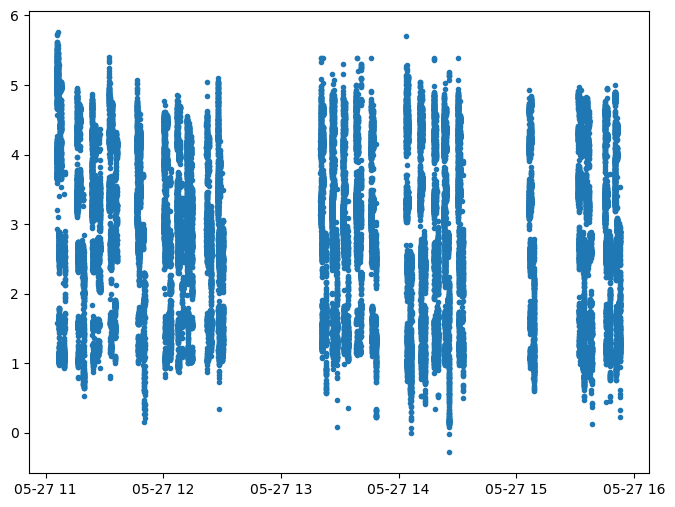

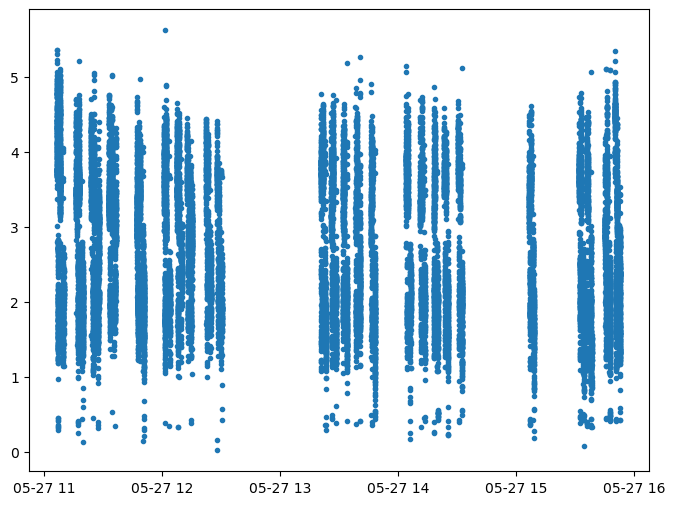

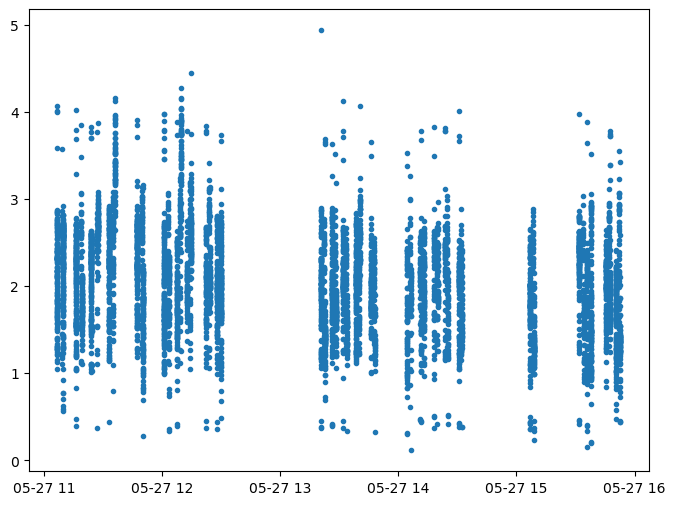

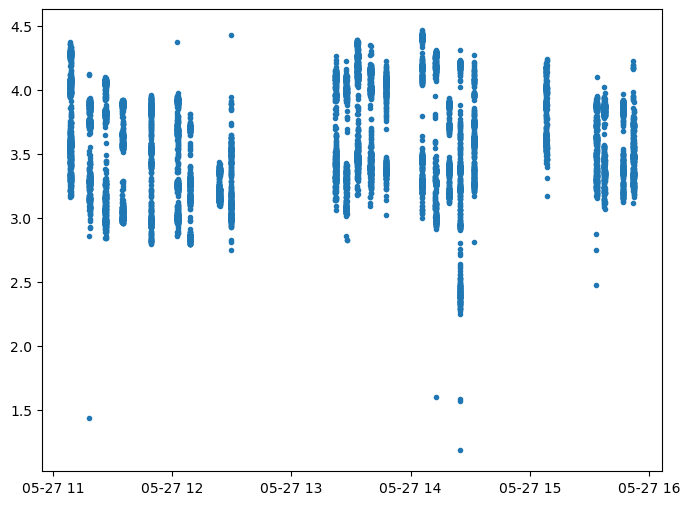

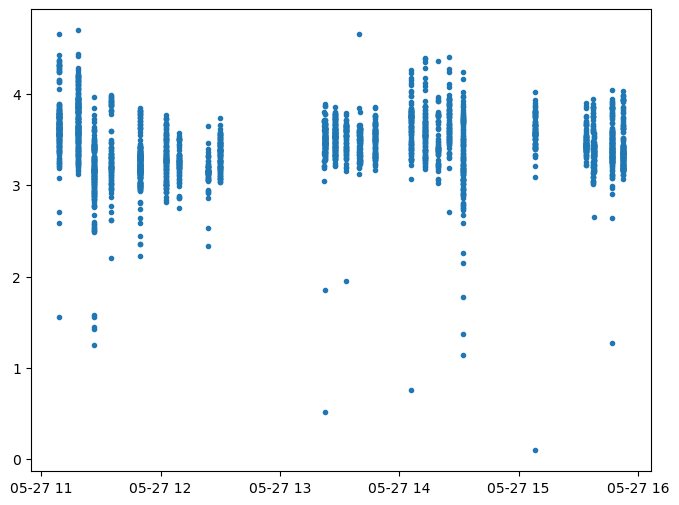

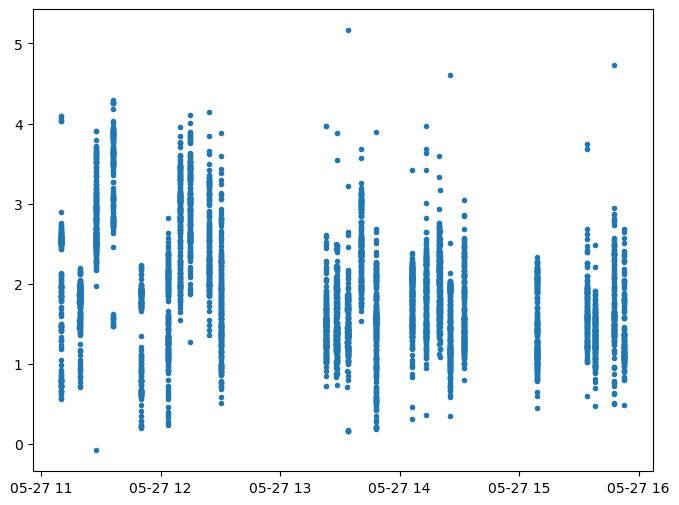

Ideas on how to use data:
1. Use only chest and belt. Select points where two chest and belt are close to eachother in time, are form the same person and show the same label/activity. Create new datapoints.